# Learn Linear regression 
https://medium.com/@diellorhoxhaj/linear-regression-car-price-prediction-and-data-analysis-112883cdd39b

Consider there’s a client that specializes in trading used cars across different states in the US. As a Data Scientist, you are given the task of creating an automated system that predicts the selling price of cars based on various features (information) such as the car’s model name, manufacture year, the current price when bought new, kilometers driven, fuels type and owners it had.

The price estimations from your system will be used to set a competitive selling price for the cars in the used car market, also it will gain trust from customers, by providing detailed explanations for the predicted selling price outputted by your system.

You are given a CSV file containing accurate historical data, which includes features and their actual selling prices. Your task is to use this data to build a reliable system that can predict car prices of any other car you might want to sell that’s not part of this set.

In [ ]:
import pandas as pd 

car_data= pd.read_csv('car_data.csv')

car_data.head() # shows the first 5 rows of the data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
car_data.info() # gives the information about the data
print("car data shape:",car_data.shape)
car_data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
car data shape: (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


The dataset contains 301 rows and 9 columns. Each row in the dataset contains information about one car. The task is to find a way to estimate the value in the “Selling_Price” column using the values in the other columns. If we can do this estimation for historical data, then we should be able to estimate selling_price for new cars that are not in this data too, simply by providing information like car name, year, present price, kilometers driven, fuel type, seller type, transmission and owner.

In [11]:
car_data.describe() # gives the summary statistics of the data


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Analysis of Numerical Features

The year column is a numerical column, as we can see the max value is 2018, and the min is 2003, we can visualize using a histogram, with 16 bins (one bin for each year). So below we could see the number of cars available (count) for each year.

In [16]:
import plotly.express as px

fig= px.histogram(car_data, x='Year', title='car data of the year', nbins=16, marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

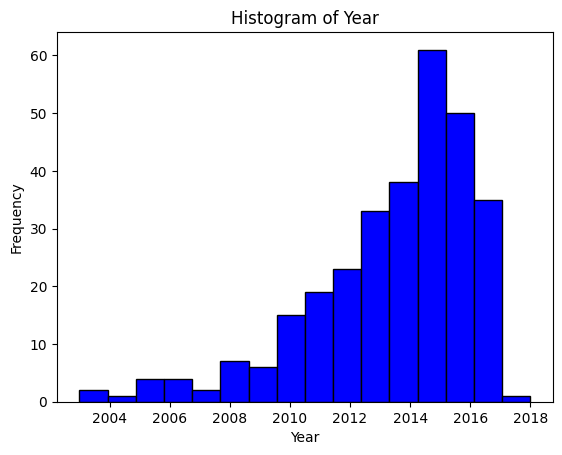

In [30]:
import matplotlib.pyplot as plt

plt.hist(car_data['Year'], bins=16, color='blue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year')
plt.show()

# Selling Price

Let’s visualize the Selling Price, and also include the categorical column Transmission to distinguish selling prices for Manual cars and Automatic cars

In [29]:
import plotly.express as px

fig= px.histogram(car_data, 
                  x='Selling_Price', 
                  title='car data of the selling price with transmission consideration',
                  color='Transmission',
                  marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

The distribution is skewed and we also can observe that automatic cars are more expensive. As the selling price increases, we could see this in ur box plot above.

# Kilometers Driven

In [32]:
fig= px.histogram(car_data, x='Kms_Driven', 
             title=' car data for KMS driven',
              marginal='box',
              color='Fuel_Type')
fig.update_layout(bargap=0.1)
fig.show()

Most of the vaules range in 0 to 100k, and some are outliers and the petrol is the most significat used Fuel. 
# KMS driven vs selling price 

Another intuitive hypothesis that we could make is that the more kilometers a car has, the lower its price will be. Let’s see if this is true. We can use a scatter plot to visualize the relationship between two numerical features.

In [47]:
import matplotlib.pyplot as plt
import plotly.express as px

fig= px.scatter(car_data, 
                x='Kms_Driven', 
                y='Selling_Price', 
                color='Fuel_Type', 
                opacity=.7,
                title='car data for KMS driven vs Selling price')
fig.update_traces(marker_size=6)

fig.show()

We can’t say that from this plot above we can’t conclude that the more kilometers the cheaper the prices. But this can also be because of the distribution of Kms since most of the values are in 0–100k.

# Selling price vs current price

In [50]:
fig= px.scatter(car_data,
                y='Selling_Price', 
                x='Present_Price',
                title='Selling price vs Present_Price',
                opacity=.7)
fig.update_traces(marker_size=6)
fig.show()

As we can see, the greater the present price the greater the selling price, this is also intuitive because the cars that are expensive, will probably also be sold at higher prices.

# Kilometer driven vs selling price 
see below, newer the car higher the selling price is 

In [57]:
fig= px.scatter(car_data,
                x='Year',
                y='Selling_Price',
                opacity=.7,
                title='KMS driven vs Selling price',
                color='Fuel_Type')
fig.update_traces(marker_size=6)
fig.show()

# Correlation 
To interpret correlation coefficients:

Strength: The values can range between -1 and 1 indicating a perfectly linear relationship where a change in one variable is followed by a perfectly consistent change to the other. In practice, you usually won’t see this kind of relationship.
A zero value of the coefficient represents no linear relationship.
Let’s say the coefficient value between two features is r:

When the value of ‘r’ is between 0 and +1/-1, it indicates that there is a relationship between the two variables, but it’s not perfectly linear — the data points don’t all fall on a straight line.

If ‘r’ is close to +1, it indicates a strong positive linear relationship. That means as one variable increases, the other variable also tends to increase, and the data points will cluster tightly around a rising straight line.

If ‘r’ is close to -1, it signifies a strong negative linear relationship. This means that as one variable increases, the other tends to decrease, with data points clustering tightly around a falling straight line.

An ‘r’ value near 0 indicates that there’s little or no linear relationship between the two variables. The data points will be spread out and won’t fall close to a line in either an increasing or decreasing direction.

In [ ]:
print(f" selling price vs present price: {car_data['Selling_Price'].corr(car_data['Present_Price'])}")
print(f" selling price vs kilometers driven: {car_data['Selling_Price'].corr(car_data['Kms_Driven'])}")

 selling price vs present price 0.8789825451614951
 selling price vs kilometers driven 0.029187090674291236


In [64]:
# drop car_data non numerical columns and find the correlation betwenn them
import numpy as np

numerical_data= car_data.select_dtypes(include=[np.number])
numerical_data.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


# Correlation matrix

Text(0.5, 1.0, 'correlation matrix')

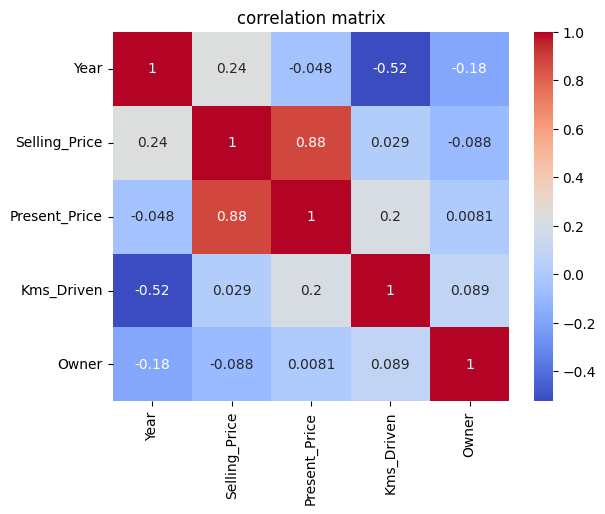

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig= sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('correlation matrix')